<a href="https://colab.research.google.com/github/walaashaabanAI/NLP-Twitter-Disaster-Classifier/blob/main/NLP_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from imblearn.over_sampling import SMOTE
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif


import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')
df_target = pd.read_csv('./dataset/sample_submission.csv')

In [4]:
df_target.isna().sum()

id        0
target    0
dtype: int64

In [5]:
df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [6]:
df_test['text'] = df_test['keyword'] + " "+df_test['location'] + " "+df_test['text']
df_train['text'] = df_train['keyword'] + " "+df_train['location'] + " "+df_train['text']

In [7]:

df_test = pd.merge(df_test, df_target, on='id')
df = pd.concat([df_train, df_test], axis=0)

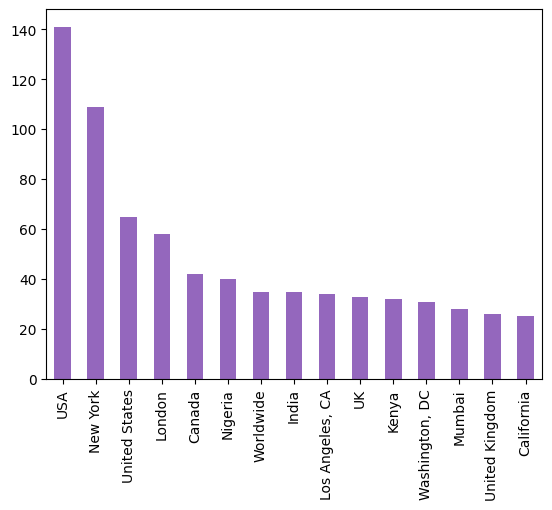

In [8]:
color = sns.color_palette()[4]
df['location'].value_counts()[:15].plot(kind='bar', color=color);

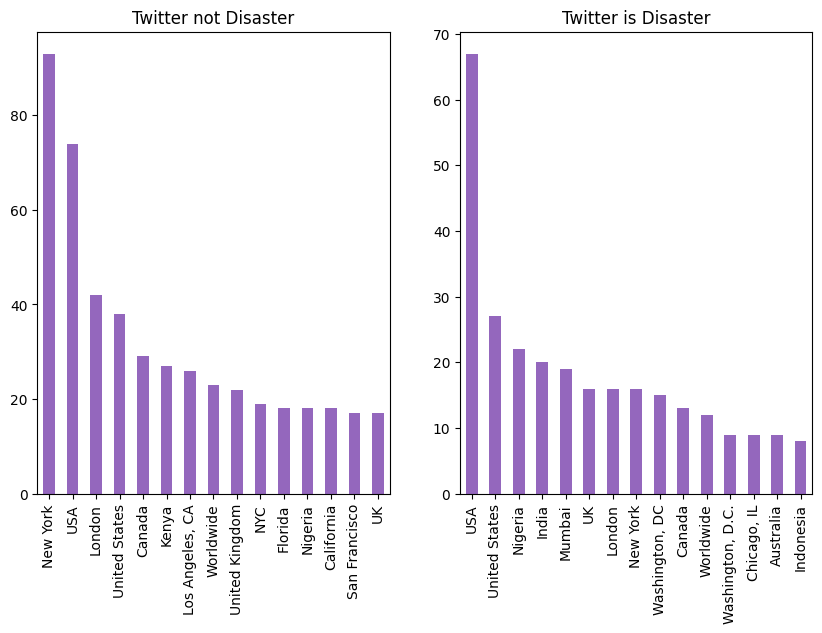

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title("Twitter not Disaster")
df[df['target'] == 0]['location'].value_counts()[:15].plot(kind='bar', color=color);
plt.subplot(1,2,2)
plt.title("Twitter is Disaster")
df[df['target'] == 1]['location'].value_counts()[:15].plot(kind='bar', color=color);


# ***Clean Tweets***

In [10]:

X = df['text'].values
y = df['target'].values



In [11]:
def cleanTweet():
    corpus=[]
    stop_words = stopwords.words("english")
    stop_words.remove("not")
    pos = PorterStemmer()
    lem = WordNetLemmatizer()
    for i in range(0, len(X)):
        tweet = re.sub('[^a-zA-Z0-9]', " ", X[i])
        tweet = tweet.lower()
        wordsInTweet = nltk.word_tokenize(tweet)
        tweet = [lem.lemmatize(word) for word in nltk.word_tokenize(tweet) if word not in stop_words]
        tweet = " ".join(tweet)
        corpus.append(tweet)
    return corpus

In [14]:
X = cleanTweet()
y = df['target'].values

# ***TF-IDF***

In [15]:
tf_vectorizer = TfidfVectorizer()
X = tf_vectorizer.fit_transform(X).toarray()
columns = tf_vectorizer.get_feature_names_out()
df_final = pd.DataFrame(data=X, columns=columns)
df_final.shape

(7238, 22021)

# **ANOVA Feature Selection**

In [17]:
selector = SelectKBest(f_classif, k=1000)
X_new = selector.fit_transform(X, y)


***SMOTE for imbalance dataset***

In [18]:
X, y = SMOTE().fit_resample(X, y)

# ***Build Model***

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

*Logistic Regression*

In [20]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred_lg= model_log.predict(X_test)
model_log_accurcy = accuracy_score(y_test, y_pred_lg)

In [21]:
model_log_accurcy

0.7987109568666336

# *Naive Bayes*

In [22]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
model_nb_accurcy = accuracy_score(y_test, y_pred_nb)

In [23]:
model_nb_accurcy

0.7605354486861676

# *K-Nearest Neighbors*

In [24]:
model_neighbor = KNeighborsClassifier(n_neighbors=5, p=6)
model_neighbor.fit(X_train, y_train)
y_pred_knn = model_neighbor.predict(X_test)
model_neighbor_accurcy = accuracy_score(y_test, y_pred_knn)

In [25]:
model_neighbor_accurcy

0.6063460585027268

# *DecisionTree*


In [26]:
model_DecisionTree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
model_DecisionTree.fit(X_train, y_train)
y_pred_dt = model_DecisionTree.predict(X_test)
model_DecisionTree_accurcy = accuracy_score(y_test, y_pred_dt)

In [27]:
model_DecisionTree_accurcy

0.645513138324244

## Random Forest

In [28]:
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train, y_train)
y_pred_rf = model_RandomForest.predict(X_test)
model_RandomForest_accurcy = accuracy_score(y_test, y_pred_rf)

In [29]:
model_RandomForest_accurcy

0.8398611799702529

# *SVM*

In [30]:
model_svm = svm.SVC(kernel="rbf")
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
model_svm_accurcy= accuracy_score(y_test, y_pred_svm)

In [31]:
model_svm_accurcy

0.8562221120475955



# *XG Boost*

In [32]:
model_xgboost = xgb.XGBClassifier(max_depth=10)
model_xgboost.fit(X_train, y_train)
y_pred_xgb = model_xgboost.predict(X_test)
model_xgboost_accurcy= accuracy_score(y_test, y_pred_xgb)


In [33]:

df_model = pd.DataFrame({
    'model':['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'DecisionTree','Random Forest', 'SVM', 'XG boost'],
    'accurcy':[model_log_accurcy, model_nb_accurcy, model_neighbor_accurcy, model_DecisionTree_accurcy, model_RandomForest_accurcy, model_svm_accurcy, model_xgboost_accurcy]
})
df_model = df_model.sort_values('accurcy')
df_model

,model,accurcy
2,K-Nearest Neighbors,0.606346
3,DecisionTree,0.645513
1,Naive Bayes,0.760535
0,Logistic Regression,0.798711
6,XG boost,0.801686
4,Random Forest,0.839861
5,SVM,0.856222


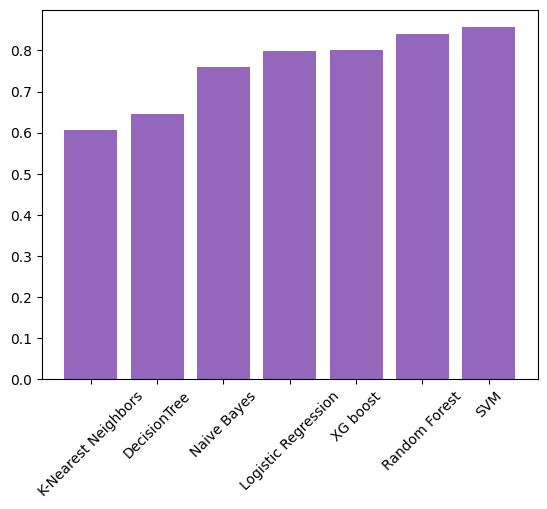

In [34]:
plt.bar(df_model['model'], df_model['accurcy'], color=color)
plt.xticks(rotation=45);

SVM is the best alghorithm

In [35]:
cf_matrix = confusion_matrix(y_test, y_pred_svm)

print(cf_matrix)

[[921  92]
 [198 806]]


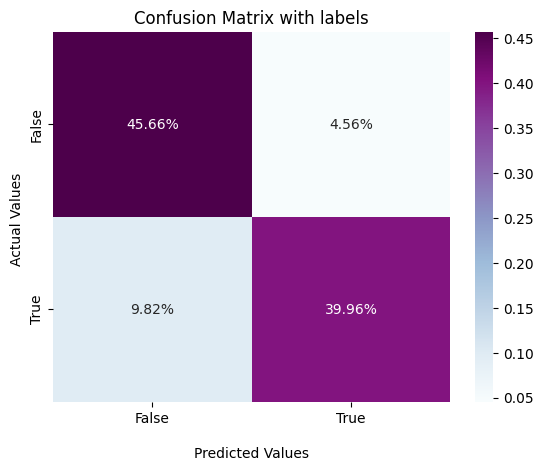

In [36]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap="BuPu")

ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()